# Mirror benchmarking data and analysis

In [1]:
import json
import numpy as np
from scipy.optimize import curve_fit
from mirror_benchmarking import *

## load MB data from json files

In [2]:
with open('data/MB_N20.json', 'r') as f:
    MB_N20 = json.load(f)
    
with open('data/MB_N26.json', 'r') as f:
    MB_N26 = json.load(f)
    
with open('data/MB_N32.json', 'r') as f:
    MB_N32 = json.load(f)

## preprocess data for plotting

In [3]:
hists_N20 = retrieve(MB_N20)
hists_N26 = retrieve(MB_N26)
hists_N32 = retrieve(MB_N32)

results_N20 = analyze_hists(hists_N20, MB_N20['surv_state'])
results_N26 = analyze_hists(hists_N26, MB_N26['surv_state'])
results_N32 = analyze_hists(hists_N32, MB_N32['surv_state'])

# define decay function
def fit_fun(L, a, b):
    return a*b**(L-1)

x1 = [2, 4, 6, 10]
x2 = [2, 4, 6, 10]
x3 = [2, 4, 7, 10]
y1 = [results_N20['avg_success_probs'][L] for L in x1]
y2 = [results_N26['avg_success_probs'][L] for L in x2]
y3 = [results_N32['avg_success_probs'][L] for L in x3]

# perform best fit
popt1, pcov1 = curve_fit(fit_fun, x1, y1, p0=[0.9, 0.9], bounds=(0,1))
popt2, pcov2 = curve_fit(fit_fun, x2, y2, p0=[0.9, 0.9], bounds=(0,1))
popt3, pcov3 = curve_fit(fit_fun, x3, y3, p0=[0.9, 0.9], bounds=(0,1))

# data points (circles in plot)

data = {'N=20': {L:results_N20['avg_success_probs'][L] for L in x1},
        'N=26': {L:results_N26['avg_success_probs'][L] for L in x2},
       'N=32': {L:results_N32['avg_success_probs'][L] for L in x3}}
    
# uncertainty (errorbars in plot)
uncertainty = {'N=20': {L:results_N20['error_data']['avg_success_probs_stds'][L] for L in x1},
              'N=26': {L:results_N26['error_data']['avg_success_probs_stds'][L] for L in x2},
              'N=32': {L:results_N32['error_data']['avg_success_probs_stds'][L] for L in x3}}

# fit funciton (solid line in plot)
def fit_func(xvals, params):
    
    return params[0]*params[1]**(np.array(xvals)-1)


# fit parameters (used in fit_func above)
fit = {'N=20': list(popt1), 'N=26':list(popt2), 'N=32': list(popt3)}

# make list for solid line in plot
line_xvals = {
    name: np.arange(np.min(list(vals.keys())), np.max(list(vals.keys())), 0.02)
    for name, vals in data.items()
}
line_yvals = {
    name: fit_func(line_xvals[name], fit[name])
    for name, vals in data.items()
}

## plot MB decay

/var/folders/8c/x6x13_8x14v7hxh6jtck57_r0000gp/T/ipykernel_48853/1055421740.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, axis="both", linestyle="--")


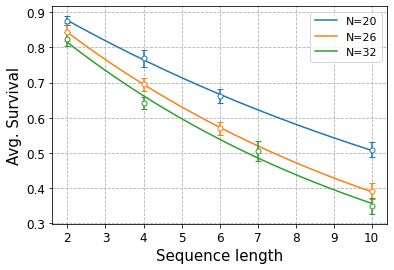

In [4]:
fig, ax = plt.subplots(1,1)
fig.set_facecolor('white')

color_list = [plt.get_cmap("tab10").colors[i] for i in range(10)]

for i, name in enumerate(data):
    ax.plot(line_xvals[name], line_yvals[name], "-", color=color_list[i])

    for length in data[name]:
        ax.errorbar(
            length,
            np.mean(data[name][length]),
            yerr=uncertainty[name][length],
            fmt="o",
            markersize=5,
            capsize=3,
            ecolor=color_list[i],
            markerfacecolor=[1, 1, 1],
            markeredgecolor=color_list[i],
        )

legend = list(data.keys())

# ax.set_title("RB decay curve", fontsize=16)
ax.grid(b=True, axis="both", linestyle="--")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Sequence length", fontsize=15)
ax.set_ylabel("Avg. Survival",  fontsize=15)
ax.legend(legend, fontsize=11)

<div align="center"> &copy; 2023 by Quantinuum. All Rights Reserved. </div>